In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("utils")

In [4]:
from data_processing import *

## Dataset

### members.csv
#### user information.


- msno

- city

- bd: age. Note: this column has outlier values, please use your judgement.

- gender

- registered_via: registration method

- registration_init_time: format ```%Y%m%d```

- expiration_date: format ```%Y%m%d```


In [5]:
csv_folder_path = "kkbox-music-recommendation-challenge/csv_folder"

members_path = "members.csv"
song_extra_info_path = "song_extra_info.csv"
songs_path = "songs.csv"
train_path = "train.csv"

In [6]:
members_df = load_members(f"{csv_folder_path}/{members_path}")

members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [7]:
members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   msno                    34403 non-null  category      
 1   city                    34403 non-null  category      
 2   bd                      34403 non-null  uint8         
 3   gender                  14501 non-null  category      
 4   registered_via          34403 non-null  category      
 5   registration_init_time  34403 non-null  datetime64[ns]
 6   expiration_date         34403 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](2), uint8(1)
memory usage: 2.1 MB


In [8]:
show_unique_values(members_df)

Unique values:

msno: (34403,)
city: (21,)
bd: (94,)
gender: (3,)
registered_via: (6,)
registration_init_time: (3862,)
expiration_date: (1484,)


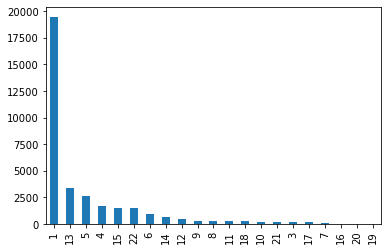

In [9]:
members_df.city.value_counts().plot(kind='bar')

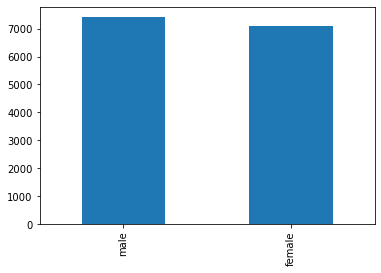

In [10]:
members_df.gender.value_counts().plot(kind='bar')

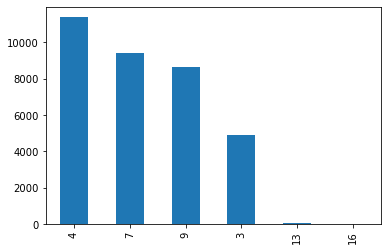

In [11]:
members_df.registered_via.value_counts().plot(kind='bar')

Unique ages: [  0   2   3   5   6   7  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  70  72  73  74  76  78  82
  83  85  87  89  90  93  95  96  97 101 102 103 105 106 107 111 112 131
 144 163 213 218]


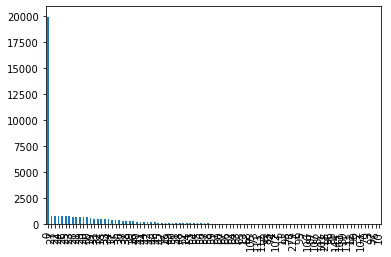

In [12]:
print(f"Unique ages: {np.sort(members_df.bd.unique())}")

members_df.bd.value_counts().plot(kind='bar')

In [13]:
members_df.expiration_date - members_df.registration_init_time

0       2223 days
1        725 days
2        457 days
3          1 days
4        138 days
           ...   
34398   1399 days
34399    937 days
34400   1498 days
34401    701 days
34402      3 days
Length: 34403, dtype: timedelta64[ns]

In [14]:
print(f"min registration: {members_df.registration_init_time.min()}")
print(f"max registration: {members_df.registration_init_time.max()}")

min registration: 2004-03-26 00:00:00
max registration: 2017-02-28 00:00:00


In [15]:
print(f"min expiration: {members_df.expiration_date.min()}")
print(f"max expiration: {members_df.expiration_date.max()}")

min expiration: 1970-01-01 00:00:00
max expiration: 2020-10-17 00:00:00


#### Выводы:

- bd: age. - Переведем в категориальный признак. Неестественным значениям присвоим категорию - "неизвестно"

- gender - Обработаем nan как неизвестный пол

- registration_init_time: format ```%Y%m%d``` - оставим 

- expiration_date: format ```%Y%m%d``` - ?


In [16]:
post_members_df = process_members(members_df)

post_members_df.head()

,msno,city,gender,registered_via,registration_init_time,expiration_date,age_group
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,FILL_NAN,7,2011-08-20,2017-09-20,FILL_NAN
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,FILL_NAN,7,2015-06-28,2017-06-22,FILL_NAN
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,FILL_NAN,4,2016-04-11,2017-07-12,FILL_NAN
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,FILL_NAN,9,2015-09-06,2015-09-07,FILL_NAN
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,FILL_NAN,4,2017-01-26,2017-06-13,FILL_NAN


---

### songs.csv
#### The songs. Note that data is in unicode.

- song_id

- song_length: in ms

- genre_ids: genre category. Some songs have multiple genres and they are separated by |

- artist_name

- composer

- lyricist

- language

In [17]:
song_df = load_songs(f"{csv_folder_path}/{songs_path}")

song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [18]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype   
---  ------       -----   
 0   song_id      category
 1   song_length  int32   
 2   genre_ids    category
 3   artist_name  category
 4   composer     category
 5   lyricist     category
 6   language     category
dtypes: category(6), int32(1)
memory usage: 157.6 MB


In [19]:
show_unique_values(song_df)

Unique values:

song_id: (2296320,)
song_length: (146534,)
genre_ids: (1046,)
artist_name: (222363,)
composer: (329824,)
lyricist: (110926,)
language: (11,)


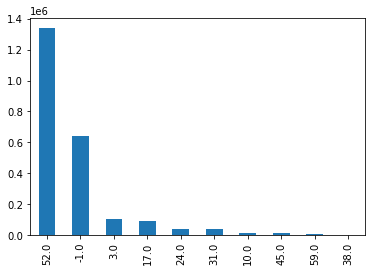

In [20]:
song_df.language.value_counts().plot(kind='bar')

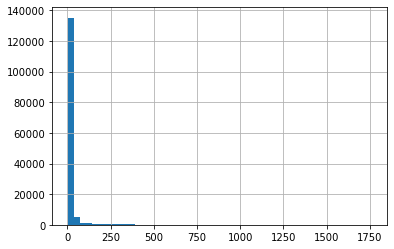

In [21]:
song_df.song_length.value_counts().hist(bins=50)

#### Выводы:

Для каждого из следующих признаков создадим новый признак, указывающий кол-во участников (жанров)
- genre_ids
- artist_name 
- composer
- lyricist

In [22]:
post_song_df = process_songs(song_df)

post_song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,1,1,1,1
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,1,1,3,1
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,FILL_NAN,FILL_NAN,31.0,1,1,0,0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,1,1,1,1
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,1,1,1,1


---

### song_extra_info.csv

- song_id

- song name - the name of the song.

- isrc - International Standard Recording Code, theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.

In [23]:
song_extra_info_df = load_song_extra_info(f"{csv_folder_path}/{song_extra_info_path}")

song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [24]:
song_extra_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype   
---  ------   -----   
 0   song_id  category
 1   name     category
 2   isrc     object  
dtypes: category(2), object(1)
memory usage: 158.2+ MB


In [25]:
show_unique_values(song_extra_info_df)

Unique values:

song_id: (2295971,)
name: (1168980,)
isrc: (1806826,)


#### Выводы

- Парсинг isrc

In [26]:
post_song_extra_info_df = process_song_extra_info(song_extra_info_df)

post_song_extra_info_df.head()

,song_id,name,isrc_country,isrc_year
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,"Taiwan, Province of China",2012
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,-1,2016
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,"Taiwan, Province of China",2008
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,United States,2013
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,"Taiwan, Province of China",2013


---

### train.csv

- msno: user id

- song_id: song id

- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.

- source_screen_name: name of the layout a user sees.

- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

- target: this is the target variable. ```target=1``` means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, ```target=0``` otherwise.

In [27]:
train_df = load_train(f"{csv_folder_path}/{train_path}")

train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype   
---  ------              -----   
 0   msno                category
 1   song_id             category
 2   source_system_tab   category
 3   source_screen_name  category
 4   source_type         category
 5   target              uint8   
dtypes: category(5), uint8(1)
memory usage: 82.4 MB


In [29]:
show_unique_values(train_df)

Unique values:

msno: (30755,)
song_id: (359966,)
source_system_tab: (9,)
source_screen_name: (21,)
source_type: (13,)
target: (2,)


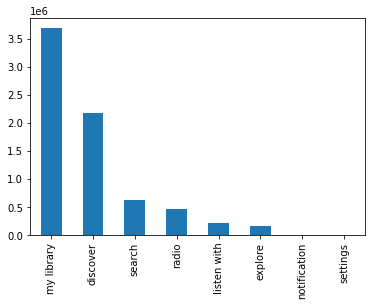

In [30]:
train_df.source_system_tab.value_counts().plot(kind='bar')

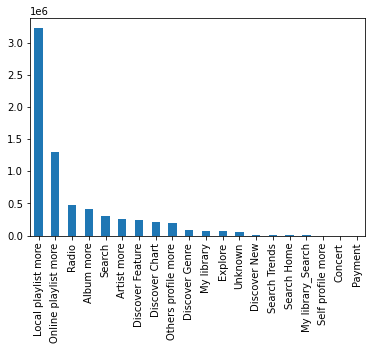

In [31]:
train_df.source_screen_name.value_counts().plot(kind='bar')

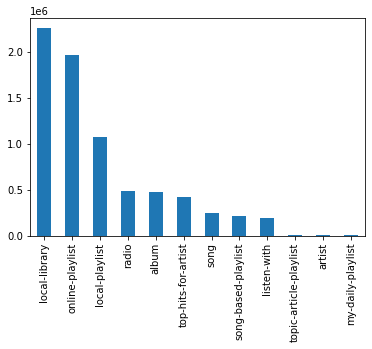

In [32]:
train_df.source_type.value_counts().plot(kind='bar')

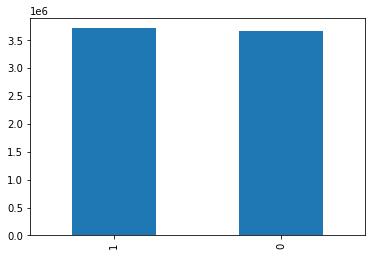

In [33]:
train_df.target.value_counts().plot(kind='bar')

---

### Extended train

объединим все датасеты в один большой train.

- Сформируем `extended_songs` из датасетов `songs` и `song_extra_info` по полю `song_id`

- Объединим `extended_songs` и `train` по полю `song_id`

- Объединим `members` и `train` по полю `msno`

In [34]:
extended_song_df = merge_songs(post_song_df, post_song_extra_info_df)

extended_song_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count,isrc_country,isrc_year
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,1,1,1,1,"Taiwan, Province of China",2014
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,1,1,3,1,-1,-1
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,FILL_NAN,FILL_NAN,31.0,1,1,0,0,-1,-1
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,1,1,1,1,"Taiwan, Province of China",2002
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,1,1,1,1,-1,-1


In [35]:
extended_train_df = process_train(train_df, post_members_df, extended_song_df)

extended_train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,gender,registered_via,registration_init_time,...,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count,isrc_country,isrc_year
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,FILL_NAN,7,2012-01-02,...,Bastille,Dan Smith| Mark Crew,FILL_NAN,52.0,1.0,1.0,2.0,0.0,United Kingdom,2016
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,female,9,2011-05-25,...,Various Artists,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,1999
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,female,9,2011-05-25,...,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,FILL_NAN,52.0,1.0,1.0,1.0,0.0,United States,2006
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,female,9,2011-05-25,...,Soundway,Kwadwo Donkoh,FILL_NAN,-1.0,1.0,1.0,1.0,0.0,United Kingdom,2010
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,FILL_NAN,7,2012-01-02,...,Brett Young,Brett Young| Kelly Archer| Justin Ebach,FILL_NAN,52.0,1.0,1.0,3.0,0.0,-1,2016


In [36]:
extended_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 24 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       category      
 3   source_screen_name      category      
 4   source_type             category      
 5   target                  uint8         
 6   city                    category      
 7   gender                  category      
 8   registered_via          category      
 9   registration_init_time  datetime64[ns]
 10  expiration_date         datetime64[ns]
 11  age_group               category      
 12  song_length             float64       
 13  genre_ids               category      
 14  artist_name             category      
 15  composer                category      
 16  lyricist                category      
 17  language                category      
 18  ge

In [37]:
print(f"missing song_id: {extended_train_df[extended_train_df.song_id == 'FILL_NAN'].shape[0]}")
print(f"missing msno: {extended_train_df[extended_train_df.msno == 'FILL_NAN'].shape[0]}")

missing song_id: 0
missing msno: 0


In [38]:
# extended_train_df.target.value_counts().plot(kind='bar')

---

### TASK_01: RecSys using GBDT



In [48]:
from catboost_custom import *
from data2catboost import TrainDataset

In [40]:
TOY_df = extended_train_df[:100]

TR_DT = TrainDataset(TOY_df)

TR_DT._df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,gender,registered_via,registration_init_time,...,artist_name,composer,lyricist,language,genre_ids_count,artist_name_count,composer_count,lyricist_count,isrc_country,isrc_year
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,FILL_NAN,7,2012-01-02,...,Bastille,Dan Smith| Mark Crew,FILL_NAN,52.0,1.0,1.0,2.0,0.0,United Kingdom,2016
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,female,9,2011-05-25,...,Various Artists,FILL_NAN,FILL_NAN,52.0,1.0,1.0,0.0,0.0,United States,1999
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,female,9,2011-05-25,...,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,FILL_NAN,52.0,1.0,1.0,1.0,0.0,United States,2006
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,female,9,2011-05-25,...,Soundway,Kwadwo Donkoh,FILL_NAN,-1.0,1.0,1.0,1.0,0.0,United Kingdom,2010
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,FILL_NAN,7,2012-01-02,...,Brett Young,Brett Young| Kelly Archer| Justin Ebach,FILL_NAN,52.0,1.0,1.0,3.0,0.0,-1,2016


In [41]:
TR_DT.to_category(["msno", "song_id", "isrc_country"])

/home/galdmitry/CODE_REPOS/HSE_RecSys/HW_02/utils/data2catboost.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._df[column] = self._df[column].astype("category")


In [42]:
TR_DT._df.msno

0     FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=
1     Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=
2     Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=
3     Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=
4     FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=
                          ...                     
95    Eaq21N7ijazDjnqU5v1jjWewJopGxgZxkKr4GIq7JTs=
96    pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=
97    pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=
98    pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=
99    pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=
Name: msno, Length: 100, dtype: category
Categories (30, object): ['0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=', '1GH1R7OI417+PPoqBtb9Jh1udsZC5XrOW2HqwjzCl2A=', '3g0bC24RD7QUeALY1IF/e8L6X3fHG298ZFIsCEG9T9Y=', '8Nlr1MyF+XUilQ4z9Cv6Re9qQIYwa5rCi90flRoyDv0=', ..., 'uQQHTQJ1nVEkBfbXe0f1/J9ML5eQhsQiocCV5TvvCRI=', 'yABGsFFqTctk/xnMj67nHmnisCwdue7XYxkYGOe9BGE=', 'zXLzFiB5jQaph3W2EyGi5DGsUloRPcoVTG4VI5ullew=', 'zcCi+lR4SecPMBbZEwj4UUBrWhgBUb

In [43]:
TR_DT.fill_na_category(["source_system_tab", "source_screen_name", "source_type"])

/home/galdmitry/CODE_REPOS/HSE_RecSys/HW_02/utils/data2catboost.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._df[column] = self._df[column].cat.add_categories("<UNK>").fillna(value="<UNK>")


In [44]:
TR_DT._df.isnull().any()

msno                      False
song_id                   False
source_system_tab         False
source_screen_name        False
source_type               False
target                    False
city                      False
gender                    False
registered_via            False
registration_init_time    False
expiration_date           False
age_group                 False
song_length               False
genre_ids                 False
artist_name               False
composer                  False
lyricist                  False
language                  False
genre_ids_count           False
artist_name_count         False
composer_count            False
lyricist_count            False
isrc_country              False
isrc_year                 False
dtype: bool

In [45]:
TR_DT = TR_DT.sort_by("msno")

### CATBOOST

In [46]:
# jupyter nbextension enable --py widgetsnbextension

In [49]:
random_state = 42

model = CatBoostModel("YetiRank", 150, "CPU", random_state)

In [50]:
scores = model.cv_scores(TR_DT, n_splits=2)

Groupwise loss function. OneHotMaxSize set to 10
0:	total: 54ms	remaining: 8.05s
1:	total: 55.7ms	remaining: 4.12s
2:	total: 57.1ms	remaining: 2.8s
3:	total: 59ms	remaining: 2.15s
4:	total: 60.2ms	remaining: 1.74s
5:	total: 61.5ms	remaining: 1.48s
6:	total: 62.8ms	remaining: 1.28s
7:	total: 64.1ms	remaining: 1.14s
8:	total: 65.9ms	remaining: 1.03s
9:	total: 67.1ms	remaining: 939ms
10:	total: 68.4ms	remaining: 864ms
11:	total: 69.6ms	remaining: 801ms
12:	total: 70.8ms	remaining: 746ms
13:	total: 71.6ms	remaining: 696ms
14:	total: 73.5ms	remaining: 662ms
15:	total: 74.7ms	remaining: 626ms
16:	total: 75.9ms	remaining: 594ms
17:	total: 77ms	remaining: 565ms
18:	total: 77.8ms	remaining: 536ms
19:	total: 78.9ms	remaining: 513ms
20:	total: 80.6ms	remaining: 495ms
21:	total: 81.3ms	remaining: 473ms
22:	total: 82.6ms	remaining: 456ms
23:	total: 83.8ms	remaining: 440ms
24:	total: 85.1ms	remaining: 425ms
25:	total: 86.3ms	remaining: 411ms
26:	total: 88.3ms	remaining: 402ms
27:	total: 89.6ms	remai

/home/galdmitry/CODE_REPOS/HSE_RecSys/HW_02/utils/metrics.py:47: RuntimeWarning: Mean of empty slice.
  return np.array(_AUC).mean()
/home/galdmitry/anaconda3/envs/RecSys/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Groupwise loss function. OneHotMaxSize set to 10
0:	total: 1.45ms	remaining: 217ms
1:	total: 2.57ms	remaining: 190ms
2:	total: 5.06ms	remaining: 248ms
3:	total: 7.51ms	remaining: 274ms
4:	total: 10.9ms	remaining: 316ms
5:	total: 12.4ms	remaining: 297ms
6:	total: 16.1ms	remaining: 328ms
7:	total: 17.7ms	remaining: 315ms
8:	total: 19.7ms	remaining: 309ms
9:	total: 20.8ms	remaining: 292ms
10:	total: 22.3ms	remaining: 282ms
11:	total: 24.1ms	remaining: 277ms
12:	total: 25.4ms	remaining: 268ms
13:	total: 26.8ms	remaining: 260ms
14:	total: 27.8ms	remaining: 250ms
15:	total: 28.6ms	remaining: 240ms
16:	total: 29.4ms	remaining: 230ms
17:	total: 31ms	remaining: 227ms
18:	total: 32.6ms	remaining: 225ms
19:	total: 34.3ms	remaining: 223ms
20:	total: 35.7ms	remaining: 219ms
21:	total: 37ms	remaining: 215ms
22:	total: 38.1ms	remaining: 210ms
23:	total: 39.5ms	remaining: 207ms
24:	total: 40.8ms	remaining: 204ms
25:	total: 42.1ms	remaining: 201ms
26:	total: 43.1ms	remaining: 196ms
27:	total: 44.3ms	re

In [51]:
scores

{'NDCG': [1.0852946122870246, 1.135967726442191], 'ROC_AUC': [nan, nan]}